In [1]:
# run this cell if this notebook is in directory notebooks
%cd ..

/tf/fiit_nn_project


In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
from src.data.load_data import load_dataset
from src.data.processing import resize_images, \
    calculate_bboxes_middle_points, encode_anns_to_yolo, \
    decode_yolo_to_anns, input_fn
from src.utils import plot_img_with_bboxes, is_point_in_bbox
from src.models.models import base_model
from train import train

import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (10, 10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
dev_x, dev_y = load_dataset('data/datasets/dev-100-person.npz')
print(len(dev_x), len(dev_y))

100 100


In [3]:
dev_x, dev_y = load_dataset('data/datasets/train-100-person-256.npz')
print(len(dev_x), len(dev_y))

100 100


In [4]:
dev_x, dev_y = load_dataset('data/datasets/train-100-person-416.npz')
print(len(dev_x), len(dev_y))

100 100


# Sanity check on 1 image - base model

In [5]:
dev_x_new = dev_x

In [6]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [7]:
img_size = (256, 256)
grid_size = (16, 16)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(1000, 16, 16, 5)

In [8]:
dev_dataset = input_fn(dev_x_new[:1], yolo_anns[:1], is_training=True, batch_size=1)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 16, 16, 5)), types: (tf.float64, tf.float32)>


In [9]:
training_params = {
    "batch_size": 1,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.001,
    "l_coord": 5.0,
    "l_noobj": 0.5
}

model, history = train(
    (dev_x_new[:1], dev_y_new[:1]),
    training_params=training_params,
    model_params=model_params,
    model_name='base_model',
    grid_size=grid_size,
    log_dir=None
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "base_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 16)      64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling_1 (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 16)      4624      
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 32)      4640      
________________________________________________________

Epoch 65/100
1/1 [==============================] - 0s 280ms/step - loss: 0.0037 - F1Score: 1.0000
Epoch 66/100
1/1 [==============================] - 0s 253ms/step - loss: 0.0034 - F1Score: 1.0000
Epoch 67/100
1/1 [==============================] - 0s 270ms/step - loss: 0.0030 - F1Score: 1.0000
Epoch 68/100
1/1 [==============================] - 0s 272ms/step - loss: 0.0026 - F1Score: 1.0000
Epoch 69/100
1/1 [==============================] - 0s 259ms/step - loss: 0.0024 - F1Score: 1.0000
Epoch 70/100
1/1 [==============================] - 0s 271ms/step - loss: 0.0023 - F1Score: 1.0000
Epoch 71/100
1/1 [==============================] - 0s 290ms/step - loss: 0.0023 - F1Score: 1.0000
Epoch 72/100
1/1 [==============================] - 0s 276ms/step - loss: 0.0022 - F1Score: 1.0000
Epoch 73/100
1/1 [==============================] - 0s 222ms/step - loss: 0.0022 - F1Score: 1.0000
Epoch 74/100
1/1 [==============================] - 0s 261ms/step - loss: 0.0020 - F1Score: 1.0000
Epoch 75/1

In [10]:
# dev_dataset = input_fn(dev_x[:1], yolo_anns[:1], is_training=False, batch_size=1)
p = model.predict(dev_dataset, steps=1)

In [11]:
p

array([[[[0.30592096, 0.23115245, 0.19425517, 0.83868814, 0.8933222 ],
         [0.3102115 , 0.2116    , 0.15325579, 0.86427784, 0.7835227 ],
         [0.26699856, 0.44852644, 0.437603  , 0.71863395, 0.6470161 ],
         ...,
         [0.27848592, 0.35205728, 0.31719565, 0.6703999 , 0.59513915],
         [0.29106915, 0.3147064 , 0.27034384, 0.83846307, 0.64218104],
         [0.28564784, 0.277502  , 0.34429914, 0.60943294, 0.7537357 ]],

        [[0.2798842 , 0.31344217, 0.4057082 , 0.66196966, 0.7228609 ],
         [0.30394262, 0.30579048, 0.16859743, 0.81386137, 0.77491283],
         [0.3152115 , 0.17791963, 0.14207113, 0.872275  , 0.8471706 ],
         ...,
         [0.30922005, 0.19271642, 0.12438741, 0.637942  , 0.77050763],
         [0.29128456, 0.26825216, 0.3695664 , 0.7574203 , 0.80223083],
         [0.2619344 , 0.4043542 , 0.6004046 , 0.6825894 , 0.72735226]],

        [[0.30191892, 0.22509208, 0.20807016, 0.822191  , 0.72319126],
         [0.2855288 , 0.43220207, 0.2695247 ,

[[0.3037072  0.16134071 0.26889676 0.76416945 0.75830704]
 [0.28916836 0.41464055 0.24352592 0.8136134  0.7537284 ]
 [0.27856088 0.40099266 0.366327   0.77107036 0.6589787 ]
 [0.29163527 0.26413828 0.337236   0.76623696 0.74387676]
 [0.27490097 0.41064698 0.4256245  0.73326254 0.73794264]
 [0.27638924 0.37486222 0.36418414 0.76263046 0.6058248 ]
 [0.29448462 0.26743448 0.2877018  0.7446013  0.7602781 ]
 [0.29740173 0.254554   0.24007595 0.70939547 0.7486231 ]
 [0.29321238 0.25159997 0.30190897 0.7732508  0.7066132 ]
 [0.28737065 0.2594367  0.33995262 0.63356435 0.7373525 ]
 [0.96871555 0.74185145 0.8862841  0.6460307  0.7273062 ]
 [0.2996738  0.27420965 0.19360432 0.72580916 0.72745025]
 [0.30803964 0.16828349 0.21118072 0.81389546 0.78274536]
 [0.30166006 0.20941544 0.21393993 0.649191   0.78638756]
 [0.29873353 0.22783607 0.26774344 0.7602967  0.731916  ]
 [0.27918297 0.38185534 0.42672145 0.7199706  0.80610335]]
[[0.28403318 0.40618503 0.31518656 0.8019736  0.73129535]
 [0.29554996 

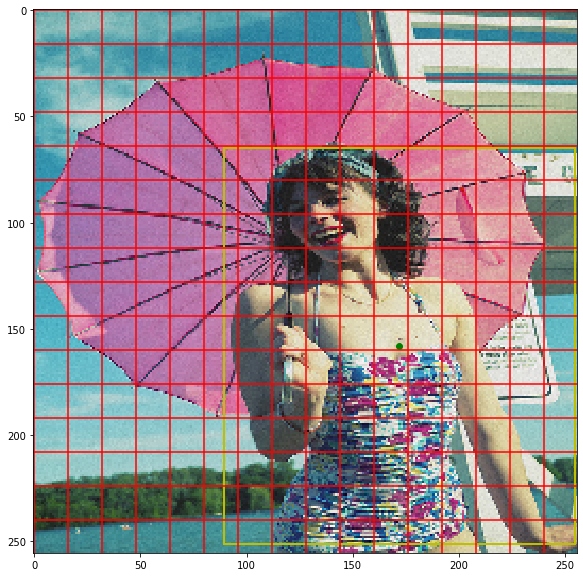

In [11]:
img_id = 0
print(p[img_id][9])
print(p[img_id][10])
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, grid=(16, 16))

# Sanity check on 100 images - base model

In [12]:
dev_x_new = dev_x

In [13]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [14]:
img_size = (256, 256)
grid_size = (16, 16)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(1000, 16, 16, 5)

In [15]:
dev_dataset = input_fn(dev_x_new[:100], yolo_anns[:100], is_training=False, batch_size=16)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 256, 256, 3), (None, 16, 16, 5)), types: (tf.float64, tf.float32)>


In [16]:
training_params = {
    "batch_size": 16,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.001,
    "l_coord": 5.0,
    "l_noobj": 0.5
}

model, history = train(
    (dev_x_new[:100], dev_y_new[:100]),
    training_params=training_params,
    model_params=model_params,
    model_name='base_model',
    grid_size=grid_size,
    log_dir=None
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "base_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 16)      64        
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling_1 (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 16)      4624      
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 32)      4640      
________________________________________________________

In [17]:
# dev_dataset = input_fn(dev_x[:1], yolo_anns[:1], is_training=False, batch_size=1)
p = model.predict(dev_dataset, steps=100/16)

In [19]:
p

array([[[[0.17070538, 0.45232224, 0.03215989, 0.1621272 , 0.03838059],
         [0.18651378, 0.38389215, 0.09483415, 0.1850014 , 0.07439917],
         [0.27238405, 0.48557827, 0.350204  , 0.6531521 , 0.78963745],
         ...,
         [0.2220085 , 0.33759797, 0.05242452, 0.20100227, 0.07533643],
         [0.13384292, 0.23074889, 0.08245909, 0.13396925, 0.02601531],
         [0.2783511 , 0.5258626 , 0.22159377, 0.6997822 , 0.83962226]],

        [[0.2754746 , 0.34152618, 0.48250815, 0.65891355, 0.8757217 ],
         [0.23226956, 0.13400304, 0.41233352, 0.2364535 , 0.30982023],
         [0.18590271, 0.5783273 , 0.5931023 , 0.47226056, 0.2807101 ],
         ...,
         [0.1659781 , 0.2415221 , 0.3691314 , 0.11540648, 0.20067656],
         [0.19419566, 0.05399787, 0.61142373, 0.1092369 , 0.24998549],
         [0.18541035, 0.71866745, 0.701707  , 0.49153355, 0.38236937]],

        [[0.19046757, 0.2427676 , 0.06830898, 0.1107119 , 0.1052981 ],
         [0.24442318, 0.3231117 , 0.28551602,

In [18]:
# pick random images
rand_images = np.random.randint(low=0, high=100, size=5)
rand_images

array([ 7, 81, 83, 43, 26])

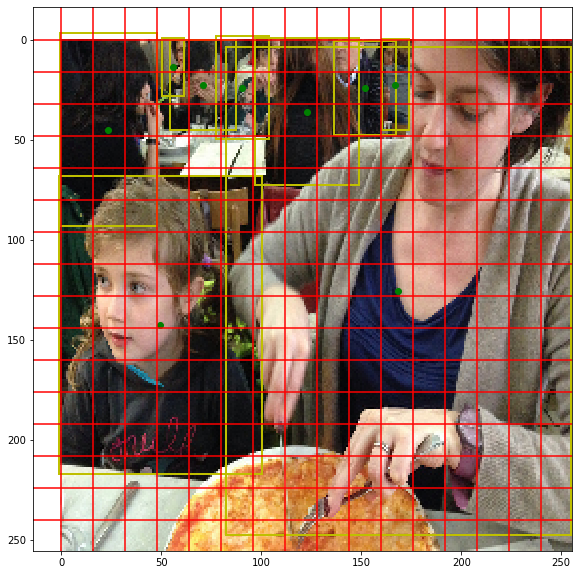

In [30]:
img_id = rand_images[0]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a , grid=(16, 16))

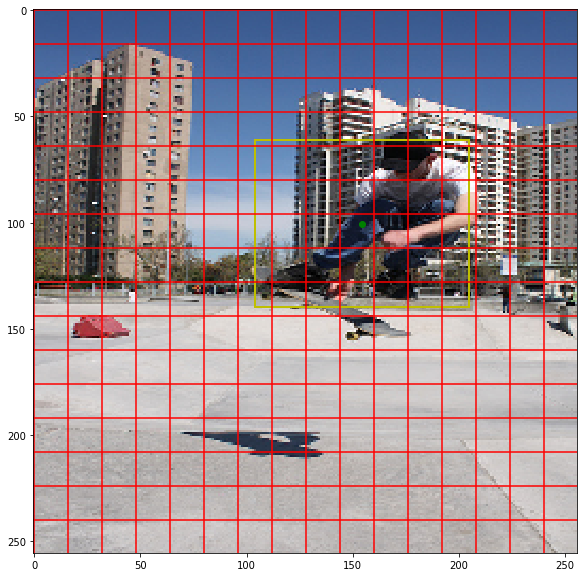

In [29]:
img_id = rand_images[1]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, grid=(16, 16))

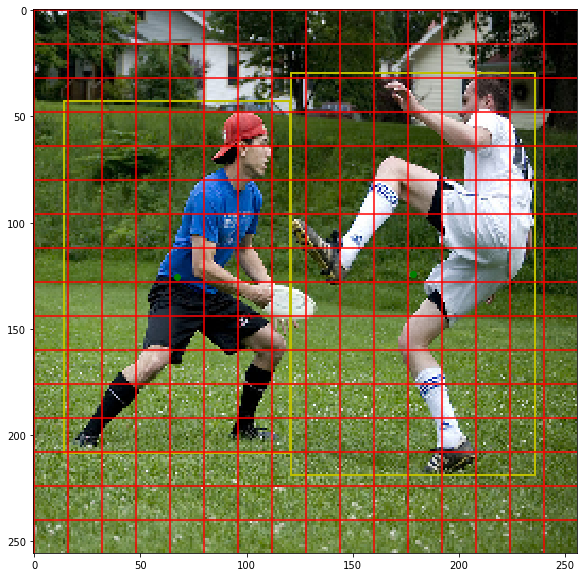

In [28]:
img_id = rand_images[2]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a , grid=(16, 16))

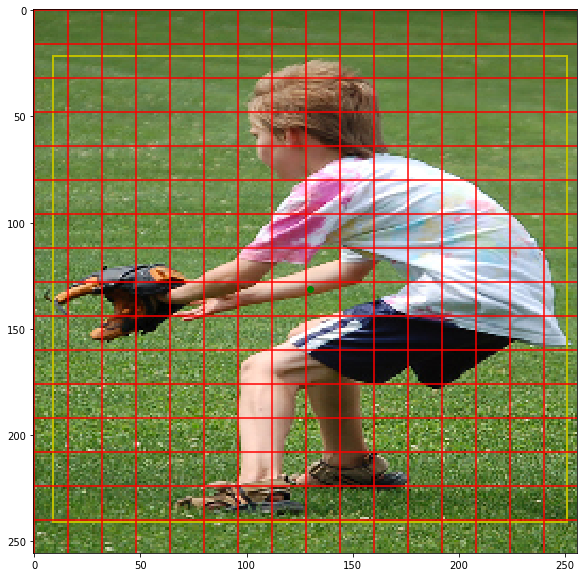

In [27]:
img_id = rand_images[3]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a , grid=(16, 16))

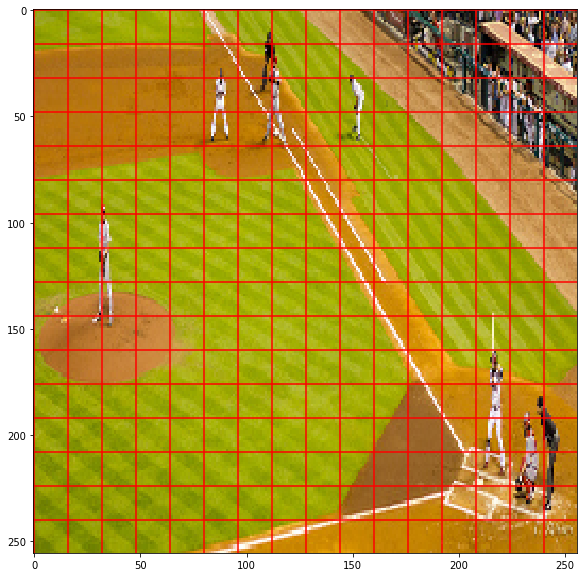

In [26]:
img_id = rand_images[4]
# print(p[img_id][7])  # uncomment if you want to see predicted confidence and bboxes
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a , grid=(16, 16))

# Sanity check on 1 image - darknet19 model

In [5]:
dev_x_new = dev_x

In [6]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [7]:
img_size = (416, 416)
grid_size = (13, 13)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(100, 13, 13, 5)

In [8]:
dev_dataset = input_fn(dev_x_new[:1], yolo_anns[:1], is_training=True, batch_size=1)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 416, 416, 3), (None, 13, 13, 5)), types: (tf.float64, tf.float32)>


In [9]:
training_params = {
    "batch_size": 1,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.000001,
    "l_coord": 5.0,
    "l_noobj": 0.5, # both this and 0.5 works
    "bn_momentum": 0.9,
}

model, history = train(
    (dev_x_new[:1], dev_y_new[:1]),
    training_params=training_params,
    model_params=model_params,
    model_name='darknet19_model',
    grid_size=grid_size,
#     log_dir='logs/darknet19_model/sanity_check_1'
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "darknet19_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
bn_1 (BatchNormalization)       (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           bn_1[0][0]                       
__________________

1/1 [==============================] - 6s 6s/step - loss: 20.7300 - F1Score: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 898ms/step - loss: 15.3189 - F1Score: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 913ms/step - loss: 15.2396 - F1Score: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 848ms/step - loss: 14.8277 - F1Score: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 867ms/step - loss: 14.3818 - F1Score: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 871ms/step - loss: 14.0194 - F1Score: 1.0000
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 13.6445 - F1Score: 1.0000
Epoch 8/100
1/1 [==============================] - 1s 881ms/step - loss: 13.1955 - F1Score: 1.0000
Epoch 9/100
1/1 [==============================] - 1s 912ms/step - loss: 12.7792 - F1Score: 1.0000
Epoch 10/100
1/1 [==============================] - 1s 861ms/step - loss: 12.3884 - F1Score: 1.0000
Epoch 11/100
1/1 [=========

Epoch 85/100
1/1 [==============================] - 1s 1s/step - loss: 0.8526 - F1Score: 1.0000
Epoch 86/100
1/1 [==============================] - 1s 1s/step - loss: 0.8309 - F1Score: 1.0000
Epoch 87/100
1/1 [==============================] - 1s 1s/step - loss: 0.8099 - F1Score: 1.0000
Epoch 88/100
1/1 [==============================] - 1s 1s/step - loss: 0.7908 - F1Score: 1.0000
Epoch 89/100
1/1 [==============================] - 1s 927ms/step - loss: 0.7726 - F1Score: 1.0000
Epoch 90/100
1/1 [==============================] - 1s 1s/step - loss: 0.7543 - F1Score: 1.0000
Epoch 91/100
1/1 [==============================] - 1s 967ms/step - loss: 0.7362 - F1Score: 1.0000
Epoch 92/100
1/1 [==============================] - 1s 1s/step - loss: 0.7195 - F1Score: 1.0000
Epoch 93/100
1/1 [==============================] - 1s 952ms/step - loss: 0.7038 - F1Score: 1.0000
Epoch 94/100
1/1 [==============================] - 1s 866ms/step - loss: 0.6881 - F1Score: 1.0000
Epoch 95/100
1/1 [==========

In [10]:
p = model.predict(dev_dataset, steps=1)

In [15]:
p

array([[[[0.44920748, 0.4416043 , 0.5611868 , 0.50398844, 0.44064564],
         [0.3981091 , 0.4373176 , 0.5375665 , 0.49453887, 0.42852664],
         [0.4023852 , 0.4331227 , 0.52705973, 0.49843538, 0.43910745],
         [0.4034557 , 0.4304897 , 0.5432771 , 0.4947333 , 0.44331372],
         [0.4029433 , 0.43292344, 0.5388264 , 0.49680668, 0.4446068 ],
         [0.40313768, 0.43266025, 0.54096246, 0.49660364, 0.44562024],
         [0.401445  , 0.43274027, 0.5425976 , 0.4958107 , 0.4461469 ],
         [0.40186355, 0.43188125, 0.54385084, 0.49755993, 0.44637936],
         [0.40256336, 0.431086  , 0.5404147 , 0.49744406, 0.44681028],
         [0.40471122, 0.4288322 , 0.5376471 , 0.4969815 , 0.4456169 ],
         [0.39760497, 0.4283851 , 0.53498864, 0.50591606, 0.44071957],
         [0.39502704, 0.41465676, 0.5314553 , 0.50537467, 0.40113232],
         [0.45072636, 0.45963848, 0.50120723, 0.5044052 , 0.46713454]],

        [[0.43795025, 0.47928268, 0.57036614, 0.538074  , 0.49060383],
    

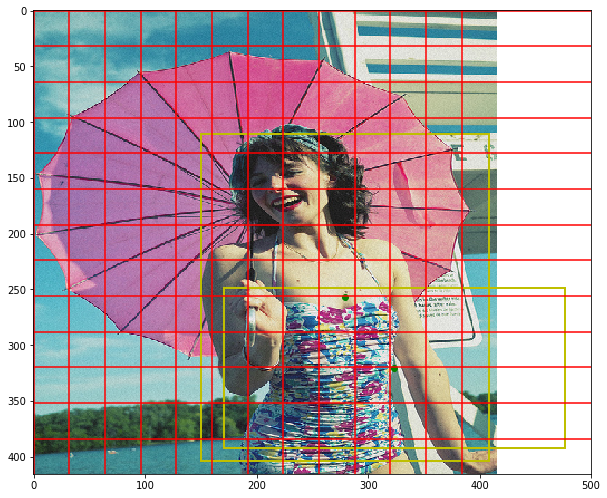

In [13]:
img_id = 0
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, grid=(13, 13))

# Sanity check on 10 images - darknet19 model

In [5]:
dev_x_new = dev_x

In [6]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [7]:
img_size = (416, 416)
grid_size = (13, 13)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(100, 13, 13, 5)

In [9]:
dev_dataset = input_fn(dev_x_new[:10], yolo_anns[:10], is_training=False, batch_size=10)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 416, 416, 3), (None, 13, 13, 5)), types: (tf.float64, tf.float32)>


In [10]:
training_params = {
    "batch_size": 10,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.000001,
    "l_coord": 5.0,
    "l_noobj": 0.5,
    "bn_momentum": 0.9,
}

model_s, history_s = train(
    (dev_x_new[:10], dev_y_new[:10]),
    training_params=training_params,
    model_params=model_params,
    model_name='darknet19_model',
    grid_size=grid_size,
    log_dir=None,
    use_lr_scheduler=True
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "darknet19_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
bn_1 (BatchNormalization)       (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           bn_1[0][0]                       
__________________

1/1 [==============================] - 12s 12s/step - loss: 79.8789 - F1Score: 0.5926
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 69.3234 - F1Score: 0.5926
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 60.7376 - F1Score: 0.5926
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 53.2804 - F1Score: 0.6667
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 46.7938 - F1Score: 0.6667
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 41.1075 - F1Score: 0.6667
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 36.1487 - F1Score: 0.6667
Epoch 8/100
1/1 [==============================] - 8s 8s/step - loss: 31.8073 - F1Score: 0.6667
Epoch 9/100
1/1 [==============================] - 7s 7s/step - loss: 27.9479 - F1Score: 0.6667
Epoch 10/100
1/1 [==============================] - 8s 8s/step - loss: 24.4071 - F1Score: 0.6667
Epoch 11/100
1/1 [==============================]

Epoch 87/100
1/1 [==============================] - 7s 7s/step - loss: 0.1652 - F1Score: 0.9444
Epoch 88/100
1/1 [==============================] - 7s 7s/step - loss: 0.1576 - F1Score: 0.9444
Epoch 89/100
1/1 [==============================] - 7s 7s/step - loss: 0.1522 - F1Score: 0.9444
Epoch 90/100
1/1 [==============================] - 7s 7s/step - loss: 0.1477 - F1Score: 0.9444
Epoch 91/100
1/1 [==============================] - 7s 7s/step - loss: 0.1418 - F1Score: 0.9444
Epoch 92/100
1/1 [==============================] - 7s 7s/step - loss: 0.1349 - F1Score: 0.9444
Epoch 93/100
1/1 [==============================] - 7s 7s/step - loss: 0.1300 - F1Score: 0.9444
Epoch 94/100
1/1 [==============================] - 7s 7s/step - loss: 0.1268 - F1Score: 0.9444
Epoch 95/100
1/1 [==============================] - 7s 7s/step - loss: 0.1233 - F1Score: 0.9444
Epoch 96/100
1/1 [==============================] - 7s 7s/step - loss: 0.1188 - F1Score: 0.9589
Epoch 97/100
1/1 [======================

In [31]:
model_s.save_weights('checkpoints/darknet19_model/sanity_check_10/model.ckpt')

In [12]:
p = model_s.predict(dev_dataset, steps=1)

In [11]:
p

array([[[[0.30592096, 0.23115245, 0.19425517, 0.83868814, 0.8933222 ],
         [0.3102115 , 0.2116    , 0.15325579, 0.86427784, 0.7835227 ],
         [0.26699856, 0.44852644, 0.437603  , 0.71863395, 0.6470161 ],
         ...,
         [0.27848592, 0.35205728, 0.31719565, 0.6703999 , 0.59513915],
         [0.29106915, 0.3147064 , 0.27034384, 0.83846307, 0.64218104],
         [0.28564784, 0.277502  , 0.34429914, 0.60943294, 0.7537357 ]],

        [[0.2798842 , 0.31344217, 0.4057082 , 0.66196966, 0.7228609 ],
         [0.30394262, 0.30579048, 0.16859743, 0.81386137, 0.77491283],
         [0.3152115 , 0.17791963, 0.14207113, 0.872275  , 0.8471706 ],
         ...,
         [0.30922005, 0.19271642, 0.12438741, 0.637942  , 0.77050763],
         [0.29128456, 0.26825216, 0.3695664 , 0.7574203 , 0.80223083],
         [0.2619344 , 0.4043542 , 0.6004046 , 0.6825894 , 0.72735226]],

        [[0.30191892, 0.22509208, 0.20807016, 0.822191  , 0.72319126],
         [0.2855288 , 0.43220207, 0.2695247 ,

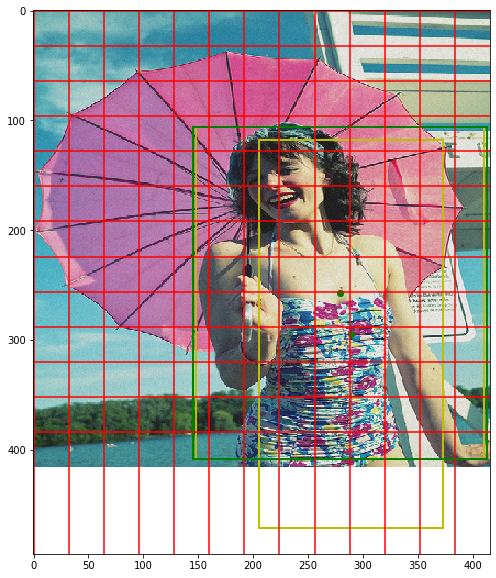

In [25]:
img_id = 0
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

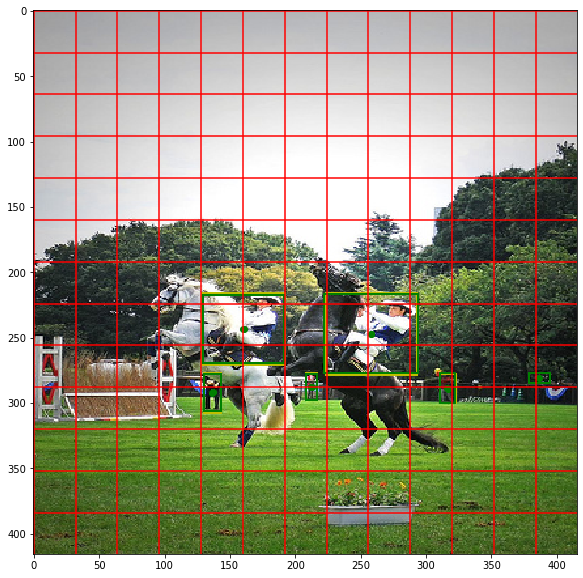

In [26]:
img_id = 1
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

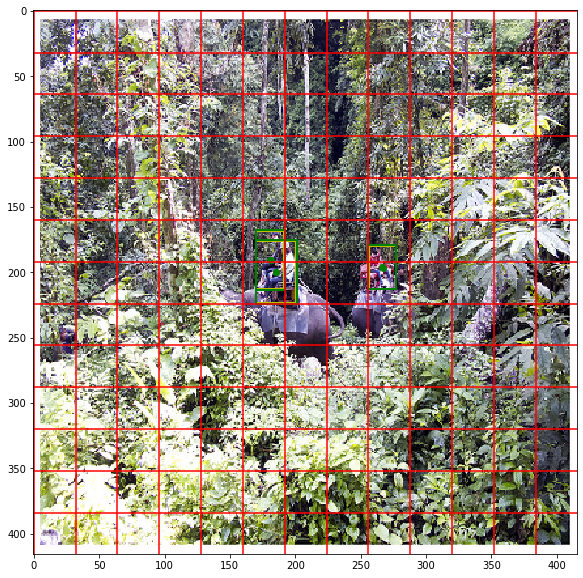

In [27]:
img_id = 2
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

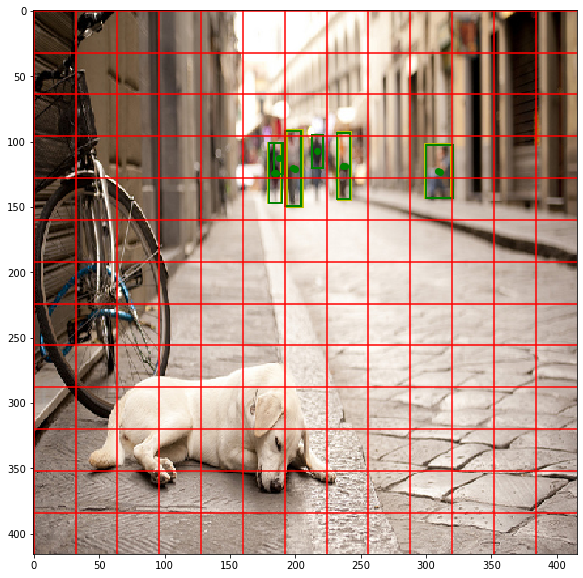

In [28]:
img_id = 3
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

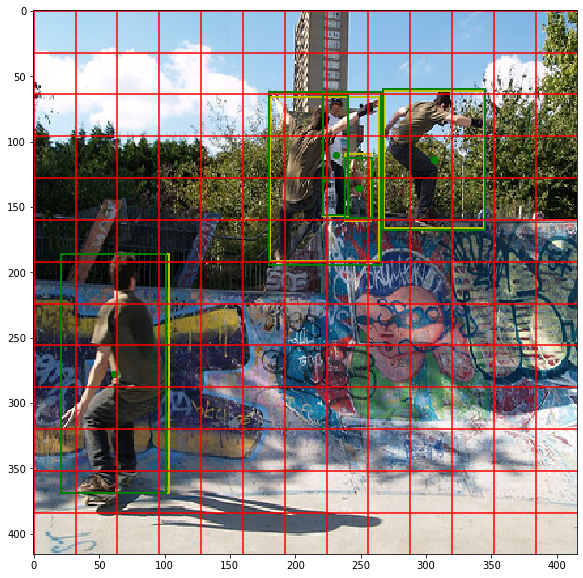

In [29]:
img_id = 4
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

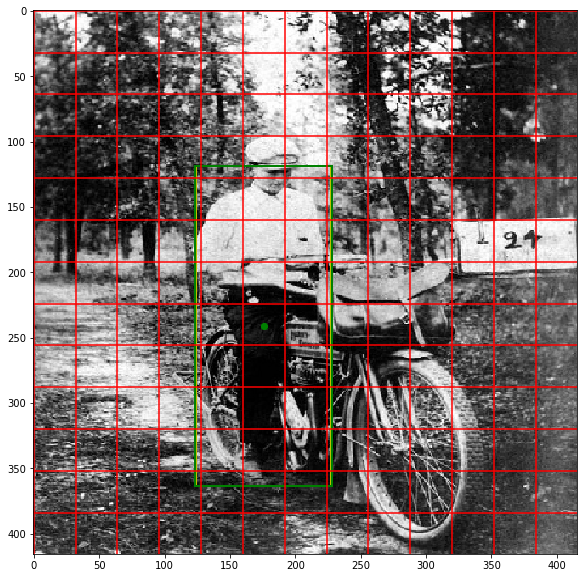

In [24]:
img_id = 5
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

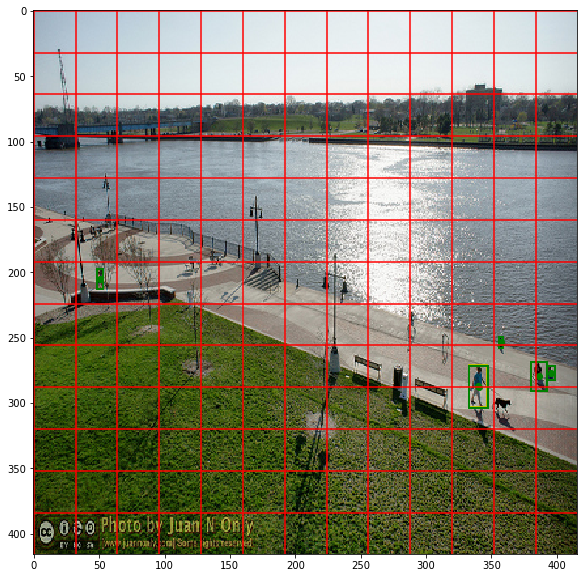

In [23]:
img_id = 6
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

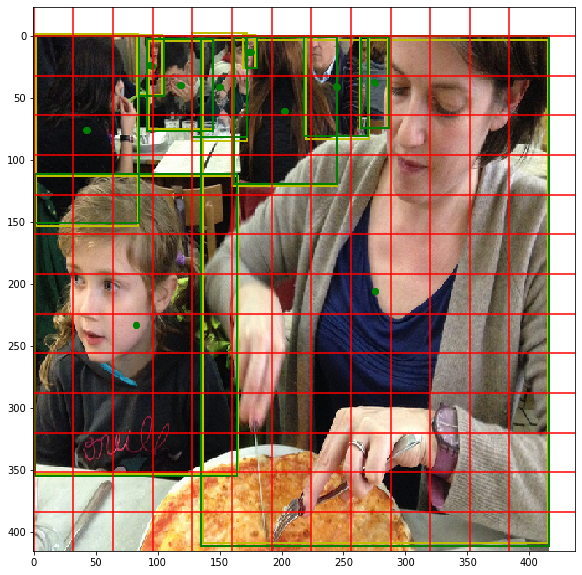

In [30]:
img_id = 7
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

# Sanity check on 100 images - darknet19 

In [5]:
dev_x_new = dev_x

In [6]:
dev_y_new = calculate_bboxes_middle_points(dev_y)

In [7]:
img_size = (416, 416)
grid_size = (13, 13)
epochs = 100

yolo_anns = np.array([
    encode_anns_to_yolo(y, img_size, grid_size)
    for y in dev_y_new
])
yolo_anns.shape

(100, 13, 13, 5)

In [26]:
dev_dataset = input_fn(dev_x_new, yolo_anns, is_training=False, batch_size=8)
print(dev_dataset)

<PrefetchDataset shapes: ((None, 416, 416, 3), (None, 13, 13, 5)), types: (tf.float64, tf.float32)>


In [12]:
training_params = {
    "batch_size": 8,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.000001,
    "l_coord": 5.0,
    "l_noobj": 0.5,
    "bn_momentum": 0.9,
}

model, history = train(
    (dev_x_new, dev_y_new),
    training_params=training_params,
    model_params=model_params,
    model_name='darknet19_model',
    grid_size=grid_size,
    log_dir=None,
    use_lr_scheduler=True
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "darknet19_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 896         input_4[0][0]                    
__________________________________________________________________________________________________
bn_1 (BatchNormalization)       (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu_63 (LeakyReLU)      (None, 416, 416, 32) 0           bn_1[0][0]                       
__________________

12/12 [==============================] - 23s 2s/step - loss: 98.6673 - F1Score: 0.7172
Epoch 2/100
12/12 [==============================] - 17s 1s/step - loss: 98.8673 - F1Score: 0.6654
Epoch 3/100
12/12 [==============================] - 17s 1s/step - loss: 98.2586 - F1Score: 0.7043
Epoch 4/100
12/12 [==============================] - 17s 1s/step - loss: 82.6417 - F1Score: 0.7416
Epoch 5/100
12/12 [==============================] - 17s 1s/step - loss: 85.9415 - F1Score: 0.6879
Epoch 6/100
12/12 [==============================] - 17s 1s/step - loss: 87.8487 - F1Score: 0.6822
Epoch 7/100
12/12 [==============================] - 17s 1s/step - loss: 71.1509 - F1Score: 0.7101
Epoch 8/100
12/12 [==============================] - 17s 1s/step - loss: 85.8164 - F1Score: 0.6867
Epoch 9/100
12/12 [==============================] - 17s 1s/step - loss: 72.2793 - F1Score: 0.7203
Epoch 10/100
12/12 [==============================] - 17s 1s/step - loss: 76.8988 - F1Score: 0.7094
Epoch 11/100
12/12 [=

Epoch 83/100
12/12 [==============================] - 18s 1s/step - loss: 239.8558 - F1Score: 0.4462
Epoch 84/100
12/12 [==============================] - 18s 1s/step - loss: 170.7742 - F1Score: 0.5429
Epoch 85/100
12/12 [==============================] - 17s 1s/step - loss: 216.5280 - F1Score: 0.4740
Epoch 86/100
12/12 [==============================] - 17s 1s/step - loss: 200.6985 - F1Score: 0.4854
Epoch 87/100
12/12 [==============================] - 17s 1s/step - loss: 193.0819 - F1Score: 0.5229
Epoch 88/100
12/12 [==============================] - 17s 1s/step - loss: 239.0191 - F1Score: 0.4110
Epoch 89/100
12/12 [==============================] - 17s 1s/step - loss: 200.4633 - F1Score: 0.5063
Epoch 90/100
12/12 [==============================] - 17s 1s/step - loss: 222.7972 - F1Score: 0.4706
Epoch 91/100
12/12 [==============================] - 17s 1s/step - loss: 213.4047 - F1Score: 0.4926
Epoch 92/100
12/12 [==============================] - 17s 1s/step - loss: 184.6630 - F1Scor

In [9]:
training_params = {
    "batch_size": 8,
    "epochs": 100
}

model_params = {
    "learning_rate": 0.000001,
    "l_coord": 5.0,
    "l_noobj": 0.5,
    "bn_momentum": 0.9,
}

model2, history = train(
    (dev_x_new, dev_y_new),
    training_params=training_params,
    model_params=model_params,
    model_name='darknet19_model',
    grid_size=grid_size,
    log_dir=None,
    use_lr_scheduler=True
)

Calculate bboxes middle points
Creeate yolo vector
Create dataset
Model: "darknet19_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 416, 416, 3) 0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 416, 416, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
bn_1 (BatchNormalization)       (None, 416, 416, 32) 128         conv_1[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 416, 416, 32) 0           bn_1[0][0]                       
__________________

12/12 [==============================] - 25s 2s/step - loss: 112.9800 - F1Score: 0.6449
Epoch 2/100
12/12 [==============================] - 15s 1s/step - loss: 104.2048 - F1Score: 0.6322
Epoch 3/100
12/12 [==============================] - 15s 1s/step - loss: 84.5423 - F1Score: 0.6847
Epoch 4/100
12/12 [==============================] - 15s 1s/step - loss: 92.5191 - F1Score: 0.6446
Epoch 5/100
12/12 [==============================] - 15s 1s/step - loss: 86.9354 - F1Score: 0.6334
Epoch 6/100
12/12 [==============================] - 15s 1s/step - loss: 76.5497 - F1Score: 0.6692
Epoch 7/100
12/12 [==============================] - 15s 1s/step - loss: 75.3166 - F1Score: 0.6840
Epoch 8/100
12/12 [==============================] - 15s 1s/step - loss: 74.9187 - F1Score: 0.6604
Epoch 9/100
12/12 [==============================] - 15s 1s/step - loss: 70.4201 - F1Score: 0.6856
Epoch 10/100
12/12 [==============================] - 15s 1s/step - loss: 67.7653 - F1Score: 0.6851
Epoch 11/100
12/12 

12/12 [==============================] - 16s 1s/step - loss: 12.4509 - F1Score: 0.7891
Epoch 84/100
12/12 [==============================] - 16s 1s/step - loss: 11.6260 - F1Score: 0.7356
Epoch 85/100
12/12 [==============================] - 15s 1s/step - loss: 13.1258 - F1Score: 0.7909
Epoch 86/100
12/12 [==============================] - 16s 1s/step - loss: 13.5267 - F1Score: 0.7049
Epoch 87/100
12/12 [==============================] - 16s 1s/step - loss: 11.2659 - F1Score: 0.7985
Epoch 88/100
12/12 [==============================] - 15s 1s/step - loss: 20.8094 - F1Score: 0.7665
Epoch 89/100
12/12 [==============================] - 15s 1s/step - loss: 14.2333 - F1Score: 0.7994
Epoch 90/100
12/12 [==============================] - 16s 1s/step - loss: 13.0358 - F1Score: 0.7715
Epoch 91/100
12/12 [==============================] - 15s 1s/step - loss: 13.0672 - F1Score: 0.7719
Epoch 92/100
12/12 [==============================] - 15s 1s/step - loss: 12.9231 - F1Score: 0.7487
Epoch 93/100


In [10]:
model2.save_weights('checkpoints/darknet19_model/sanity_check_100/model.ckpt')

In [28]:
p = model2.predict(dev_dataset, steps=100/8)

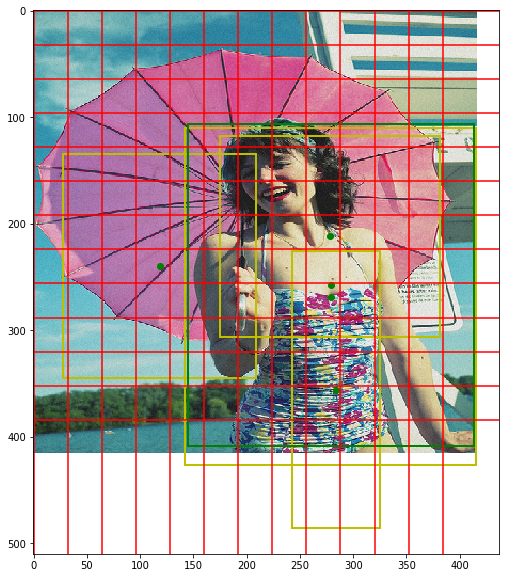

In [17]:
img_id = 0
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.6)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

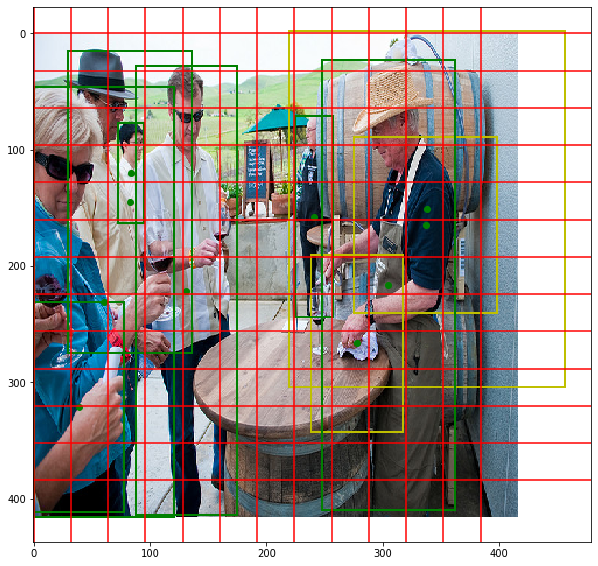

In [36]:
img_id = 20
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.6)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))

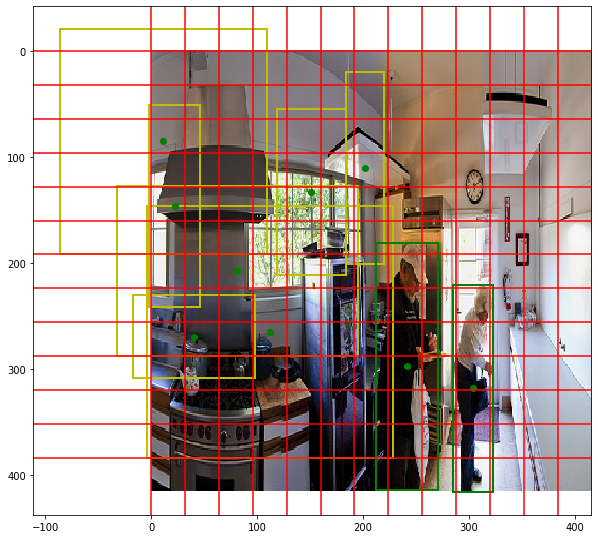

In [38]:
img_id = 25
a = decode_yolo_to_anns(p[img_id], img_size, grid_size, confidence_threshold=0.5)
plot_img_with_bboxes(dev_x_new[img_id], a, true_anns=dev_y_new[img_id], show_category=False, grid=(13, 13))